![animal](https://i.postimg.cc/fTyQm0Rm/Animals-VGG.gif)

<h2>Summary 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this project, we will develop an image classification model to categorize images into 10 different animal classes. We will use Python, TensorFlow, and Keras to implement a Convolutional Neural Network (CNN) that can accurately classify these images. The model will be trained and evaluated on a dataset containing various images of animals, and we will apply advanced techniques to ensure high performance and accuracy in the classification task.</li>
    </ul>
</div>

<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0cb7f2; overflow:hidden"><b> Import Libraries </b></div>

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import matplotlib.pyplot as plt
import random
from matplotlib.cm import viridis
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout, Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0cb7f2; overflow:hidden"><b> Processing Images </b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this section we are going to develop the resize of images, which is essential to ensure that all images have a consistent size (224x224 pixels) before feeding them into a neural network. This step is important because the neural networks require inputs with uniform shape to function correctly, and resizing also helps to reduce the computational load by standardizing the image dimensions, making the training process more efficient and improving model performance.</li>
    </ul>
</div>

In [2]:
input_dir = '/kaggle/input/animals10/raw-img'
output_dir = '/kaggle/working/animals10-resized'
target_size = (224, 224) 

os.makedirs(output_dir, exist_ok=True)

def resize_image(input_path, output_path, size):
    with Image.open(input_path) as img:
        img = img.resize(size)
        img.save(output_path)

def process_directory(input_dir, output_dir, size):
    total_files = 0
    processed_files = 0

    # Counting the total number of files to process
    for root, dirs, files in os.walk(input_dir):
        total_files += len(files)

    
    for root, dirs, files in os.walk(input_dir):
        relative_path = os.path.relpath(root, input_dir)
        output_folder = os.path.join(output_dir, relative_path)
        os.makedirs(output_folder, exist_ok=True)

        for file in files:
            input_file_path = os.path.join(root, file)
            output_file_path = os.path.join(output_folder, file)
            try:
                resize_image(input_file_path, output_file_path, size)
                processed_files += 1
            except Exception as e:
                print(f"Failed to process {input_file_path}: {e}")

    print(f"Resizing completed: {processed_files}/{total_files} files processed.")

process_directory(input_dir, output_dir, target_size)

Resizing completed: 26179/26179 files processed.


<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0cb7f2; overflow:hidden"><b> Data Visualization </b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this section we will use data visualization to gain a better understanding of the dataset by displaying the number of images belonging to each class. Additionally, we'll showcase a batch of example images from each class to provide a visual overview. </li>
    </ul>
</div>

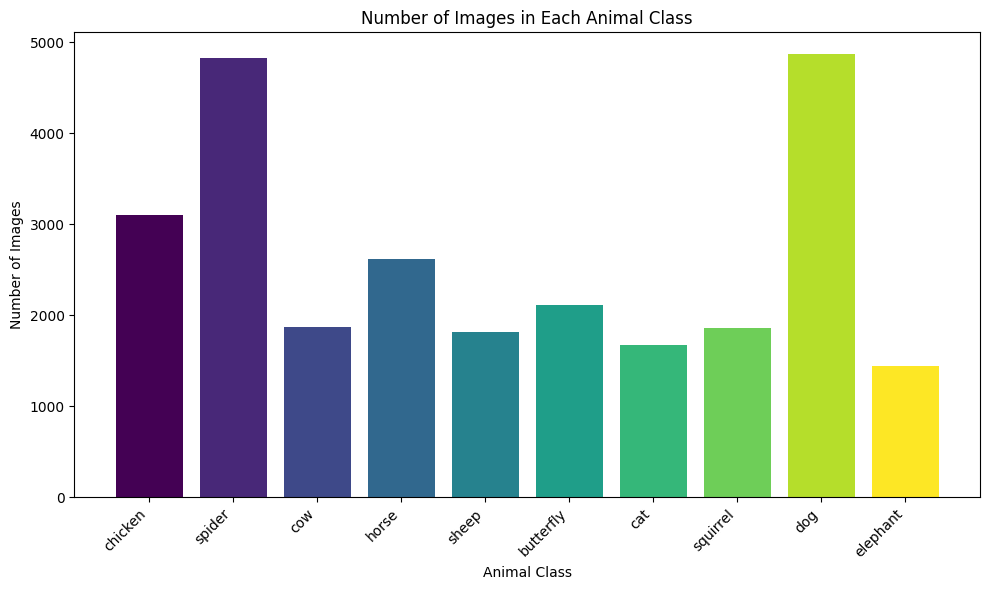

In [3]:
folder_path = '/kaggle/working/animals10-resized'

# Translation dictionary from Italian to English
class_translation = {
    "cane": "dog",
    "cavallo": "horse",
    "elefante": "elephant",
    "farfalla": "butterfly",
    "gallina": "chicken",
    "gatto": "cat",
    "mucca": "cow",
    "pecora": "sheep",
    "scoiattolo": "squirrel",
    "ragno": "spider"
}


subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
translated_subfolders = [class_translation[subfolder] for subfolder in subfolders]


image_counts = {class_translation[subfolder]: len(os.listdir(os.path.join(folder_path, subfolder))) for subfolder in subfolders}

colors = viridis(np.linspace(0, 1, len(image_counts)))


plt.figure(figsize=(10, 6))
plt.bar(image_counts.keys(), image_counts.values(), color=colors)
plt.xlabel('Animal Class')
plt.ylabel('Number of Images')
plt.title('Number of Images in Each Animal Class')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

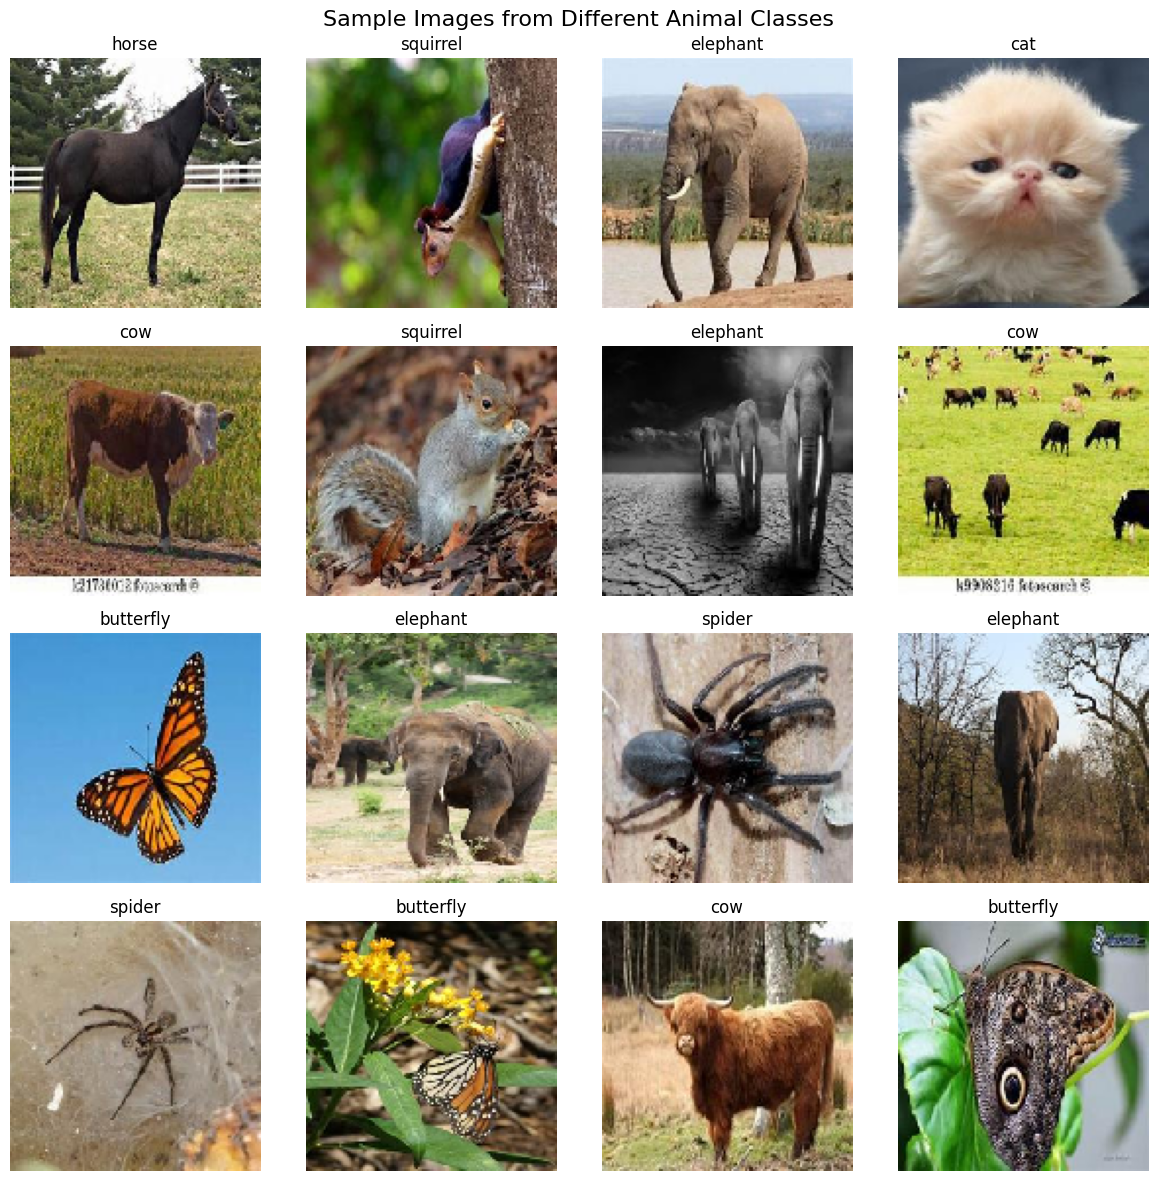

In [4]:
subfolders = [f for f in os.listdir(folder_path) if os.path.isdir(os.path.join(folder_path, f))]
translated_subfolders = {subfolder: class_translation[subfolder] for subfolder in subfolders}


fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle('Sample Images from Different Animal Classes', fontsize=16)

for i, ax in enumerate(axes.flat):
    selected_class = random.choice(list(translated_subfolders.keys()))
    class_name = translated_subfolders[selected_class]
    class_folder = os.path.join(folder_path, selected_class)
    selected_image = random.choice(os.listdir(class_folder))
    
    img = image.load_img(os.path.join(class_folder, selected_image), target_size=(128, 128))
    ax.imshow(img)
    ax.axis('off')
    
    ax.set_title(class_name)

plt.tight_layout()
plt.show()

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>We will also perform a data split, showing the distribution of images across each class in both the training and validation sets, helping to ensure a balanced dataset for model training. </li>
    </ul>
</div>

In [5]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  
    #rotation_range=10,
    #width_shift_range=0.1,
    #height_shift_range=0.1,
    #shear_range=0.1,
    #zoom_range=0.1,
    #horizontal_flip=True,
    #fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='training'  
)

validation_generator = datagen.flow_from_directory(
    folder_path,
    target_size=(224, 224),
    batch_size=20,
    class_mode='categorical',
    subset='validation'  
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


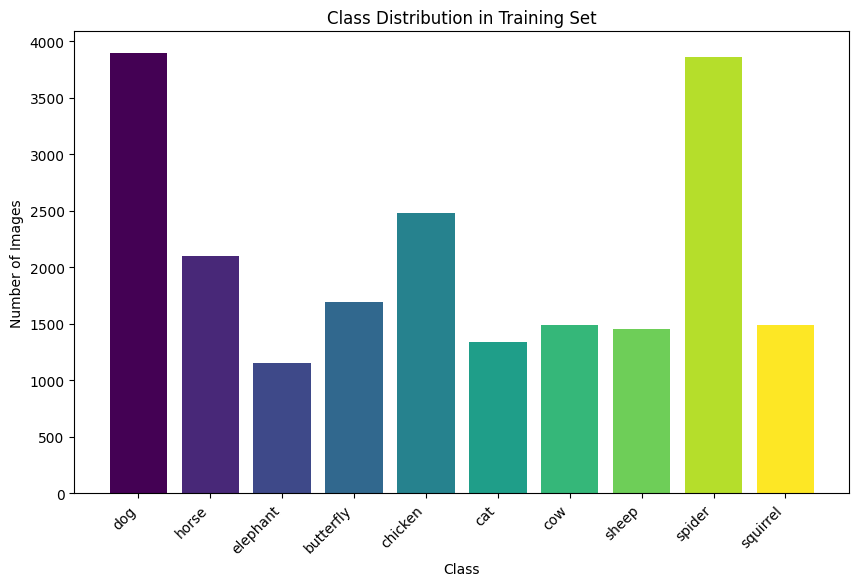

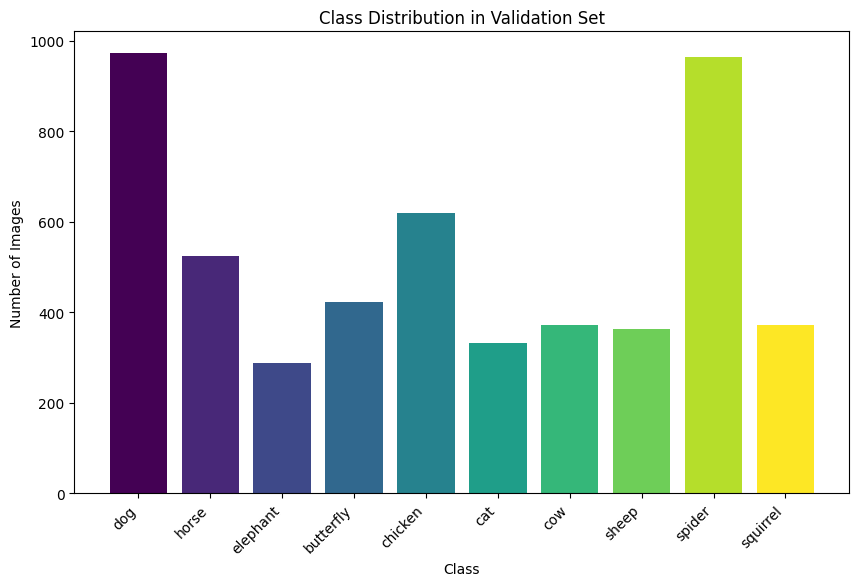

In [6]:

train_class_counts = np.bincount(train_generator.classes)
train_class_names = [class_translation[class_name] for class_name in train_generator.class_indices.keys()]


val_class_counts = np.bincount(validation_generator.classes)
val_class_names = [class_translation[class_name] for class_name in validation_generator.class_indices.keys()]


colors_train = viridis(np.linspace(0, 1, len(train_class_names)))
plt.figure(figsize=(10, 6))
plt.bar(train_class_names, train_class_counts, color=colors_train)
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()


colors_val = viridis(np.linspace(0, 1, len(val_class_names)))
plt.figure(figsize=(10, 6))
plt.bar(val_class_names, val_class_counts, color=colors_val)
plt.title('Class Distribution in Validation Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=45, ha='right')
plt.show()

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#0cb7f2; overflow:hidden"><b> Build Model </b></div>

<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this section we are going to build a model that uses the pre-trained VGG16 model as the base, which is loaded with ImageNet weights. The top layers of VGG16 are removed, and custom layers are added for the specific classification task. These custom layers include global average pooling, dense layers with batch normalization and dropout for regularization, and a final softmax layer for multi-class classification. The first 15 layers of the VGG16 model are set to be trainable, allowing fine-tuning, while the remaining layers are frozen to retain the pre-trained weights. The model is then compiled with the Adam optimizer, categorical cross-entropy loss, and accuracy as the evaluation metric.
 </li>
    </ul>
</div>

In [7]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.3)(x)  
x = Dense(512)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x) 
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:15]: 
    layer.trainable = True
for layer in base_model.layers[15:]:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    'best_model.keras',         
    monitor='val_accuracy',  
    save_best_only=True,      
    mode='max',              
    verbose=1               
)

history = model.fit(
    train_generator,
    steps_per_epoch=80,            
    epochs=150,
    validation_data=validation_generator,
    validation_steps=80,
    callbacks=[checkpoint]        
)


Epoch 1/150


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1724719729.767206      85 service.cc:145] XLA service 0x7abd34004c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1724719729.767258      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1724719729.767262      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1724719760.775971      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.1426 - loss: 2.4786
Epoch 1: val_accuracy improved from -inf to 0.15625, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 66s 381ms/step - accuracy: 0.1430 - loss: 2.4774 - val_accuracy: 0.1562 - val_loss: 2.6924
Epoch 2/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.2852 - loss: 2.0506
Epoch 2: val_accuracy improved from 0.15625 to 0.27125, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 376ms/step - accuracy: 0.2857 - loss: 2.0494 - val_accuracy: 0.2713 - val_loss: 2.0781
Epoch 3/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.3729 - loss: 1.8621
Epoch 3: val_accuracy did not improve from 0.27125
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 374ms/step - accuracy: 0.3729 - loss: 1.8617 - val_accuracy: 0.1688 - val_loss: 4.1448
Epoch 4/150
66/80 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step - accuracy: 0.3918 - loss: 1.7058

I0000 00:00:1724719885.581280      83 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_7', 208 bytes spill stores, 208 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_6', 20 bytes spill stores, 20 bytes spill loads



80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.3946 - loss: 1.7000
Epoch 4: val_accuracy did not improve from 0.27125
80/80 ━━━━━━━━━━━━━━━━━━━━ 48s 600ms/step - accuracy: 0.3949 - loss: 1.6995 - val_accuracy: 0.2083 - val_loss: 2.2579
Epoch 5/150


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step - accuracy: 0.4606 - loss: 1.5580
Epoch 5: val_accuracy did not improve from 0.27125
80/80 ━━━━━━━━━━━━━━━━━━━━ 30s 382ms/step - accuracy: 0.4610 - loss: 1.5571 - val_accuracy: 0.2181 - val_loss: 4.3608
Epoch 6/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5651 - loss: 1.2629
Epoch 6: val_accuracy improved from 0.27125 to 0.32313, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.5650 - loss: 1.2631 - val_accuracy: 0.3231 - val_loss: 3.1749
Epoch 7/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5672 - loss: 1.2300
Epoch 7: val_accuracy improved from 0.32313 to 0.57187, saving model to best_model.keras
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 391ms/step - accuracy: 0.5674 - loss: 1.2293 - val_accuracy: 0.5719 - val_loss: 1.2750
Epoch 8/150
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.6172 - loss: 1.1466
Epoch 8: val_accuracy did not improve from 0.57187
80/80 ━━━━━━━━━━━━━━━━━━━━ 25s

In [9]:
from tensorflow.keras.models import load_model


# Set seed for reproducibility 42
seed_value = 42
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

best_model = load_model('best_model.keras')

test_loss, test_accuracy = best_model.evaluate(validation_generator, steps=80)

print(f"Test Accuracy: {test_accuracy:.4f}")

80/80 ━━━━━━━━━━━━━━━━━━━━ 9s 100ms/step - accuracy: 0.9108 - loss: 0.3060
Test Accuracy: 0.9038


<h2>Conclusions 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #0cb7f2;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>The image classification project successfully achieved an accuracy exceeding 90%, demonstrating the effectiveness of leveraging a pre-trained VGG16 model combined with custom top layers for fine-tuning. This approach not only harnesses the power of deep learning but also shows how transfer learning can significantly enhance performance in image classification tasks. The high accuracy underscores the robustness of this model in accurately classifying images across different categories.</li>
    </ul>
</div>

# **Thank you for exploring this work!** 

If you find it helpful, please consider upvoting it ❤️. 

Your support is greatly appreciated 🤩!